# EDA and Hypothesis testing of Insurance Data 
***

# Data Description:
The data at hand contains medical costs of people
characterized by certain attributes.

### Domain:
Healthcare
<br>

### Context:
Leveraging customer information is paramount for most
businesses. In the case of an insurance company, attributes of
customers like the ones mentioned below can be crucial in
making business decisions. Hence, knowing to explore and
generate value out of such data can be an invaluable skill to
have.

### Attribute Information:
  **age** : age of primary beneficiary
<br>  __sex__ : insurance contractor gender, female, male
<br>  **bmi** : Body mass index, providing an understanding of body,
          weights that are relatively high or low relative to height,
          bjective index of body weight (kg / m ^ 2) using the ratio of
          height to weight, ideally 18.5 to 24.9
<br>  **children** : Number of children covered by health insurance /
          Number of dependents
<br>  **smoker** : Smoking
<br>  **region** : the beneficiary's residential area in the US, northeast,
southeast, southwest, northwest.
<br>  **charges** : Individual medical costs billed by health insurance.

***

## 1. Import the necessary libraries

In [1]:
# Import requied libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

## 2. Read the data as a data frame

In [2]:
# Read data file
df = pd.read_csv("./data/insurance.csv")

## 3. Basic EDA 

### a. Shape of the Data 

In [3]:
r, c =df.shape
print("Number of rows: ", r)
print ("Number of columns: ", c)

Number of rows:  1338
Number of columns:  7


In [4]:
# Examine the data
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## b. Datatypes of each attribute

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
# Unique values of categorical columns

In [7]:
print("Smoker ", df['smoker'].unique())

print("Sex ", df['sex'].unique())

print("Region ", df['region'].unique())

print("Children ", df['children'].unique())

Smoker  ['yes' 'no']
Sex  ['female' 'male']
Region  ['southwest' 'southeast' 'northwest' 'northeast']
Children  [0 1 3 2 5 4]


## c. Checking the presence of missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


==> As each column has same number of as that of total number of rows, There are no missing values. 

## d. 5 point summary of numerical attributes

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


==> Charges column has large value of standard deviation

In [10]:
#  View statistics of non-numerical columns

In [11]:
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [12]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

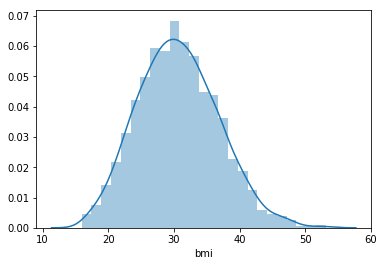

In [13]:
sns.distplot(df['bmi'])

**==> The distribution of BMI is normal**

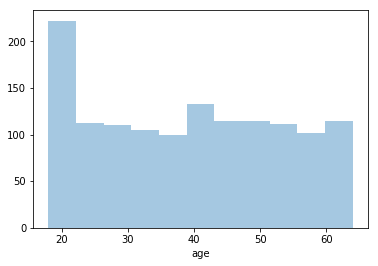

In [14]:
sns.distplot(df['age'], kde = False)

**==> The distribution of 'age' is not a normal distribution, it is almost uniform after age 23. The range of distribution is from 18 to 64. Maximum people are of age around 20.**

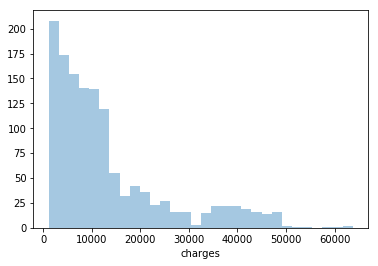

In [15]:
sns.distplot(df['charges'], kde =False)

**==> The distribution of 'charges' is not a normal distribution. There are more people with less insurance charges and very few people with higher charges.The frequncy of distribution is decreasing with increase in charges.**

## e. Measure of skewness and Checking the presence of outliers of ‘bmi’, ‘age’ and ‘charges’ columns.

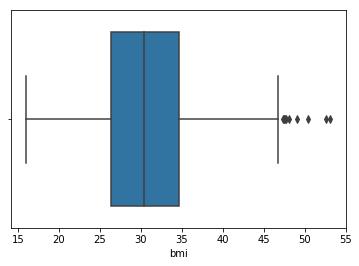

In [16]:
sns.boxplot(df['bmi'])

* **Skewness**: BMI is right skewed
* **Outliers**: There are outliers on right side.

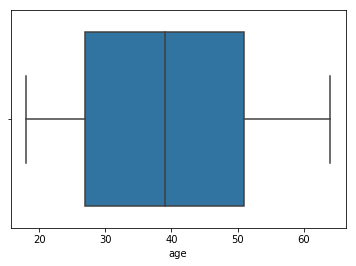

In [17]:
sns.boxplot(df['age'])

* **Skewness**: Age is symmetric
* **Outliers**: There are no outliers.

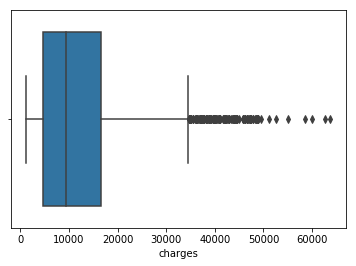

In [18]:
sns.boxplot(df['charges'])

* **Skewness**: BMI is right skewed
* **Outliers**: There are outliers on right side.

In [19]:
#Print skew values of numerical columns
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

**==> Charges is more positive (right) skewed**

## f. Distribution of categorical columns 

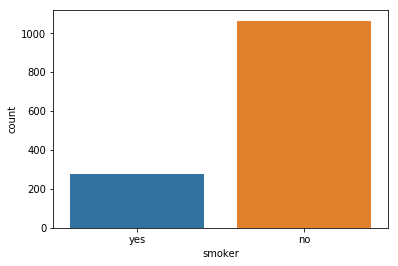

In [20]:
# Distribution of smoker
sns.countplot(x='smoker', data = df)

**==> Number of smokers is less than number of non-smokers**

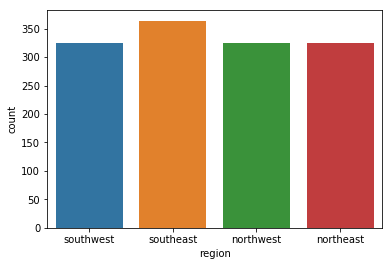

In [21]:
sns.countplot(x='region', data = df)

**==> Most people are from southeast region. There are almost same number of people from other regions**

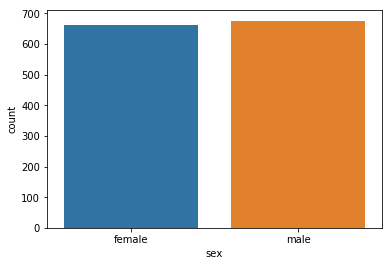

In [22]:
sns.countplot(x='sex', data = df)

**==>Distribution of sex is uniform**

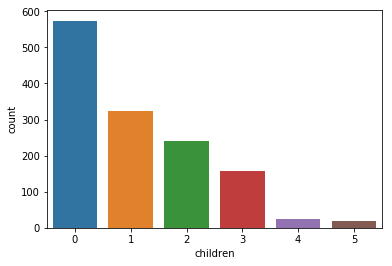

In [23]:
sns.countplot(x='children', data = df)

**==>Frequency of distribution is dicreasing with increase in childeren count**

## g. Distribution of charges across smokers and non-smokers

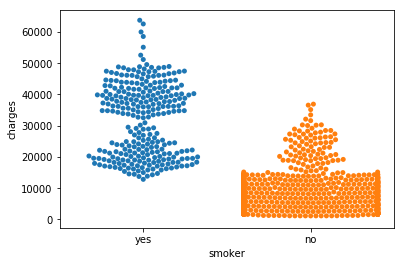

In [24]:
sns.swarmplot(x='smoker',y = 'charges', data = df)

**==> Charges are significantly higher for smokers than non-smokers**

## h. Distribution of BMI across male and female

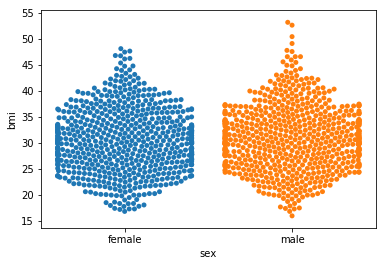

In [25]:
sns.swarmplot(x='sex', y ="bmi", data = df)

**==> Distribution of BMI is not significantly different in male and female.**

## i. Pair plot that includes all numerical columns of the dataframe

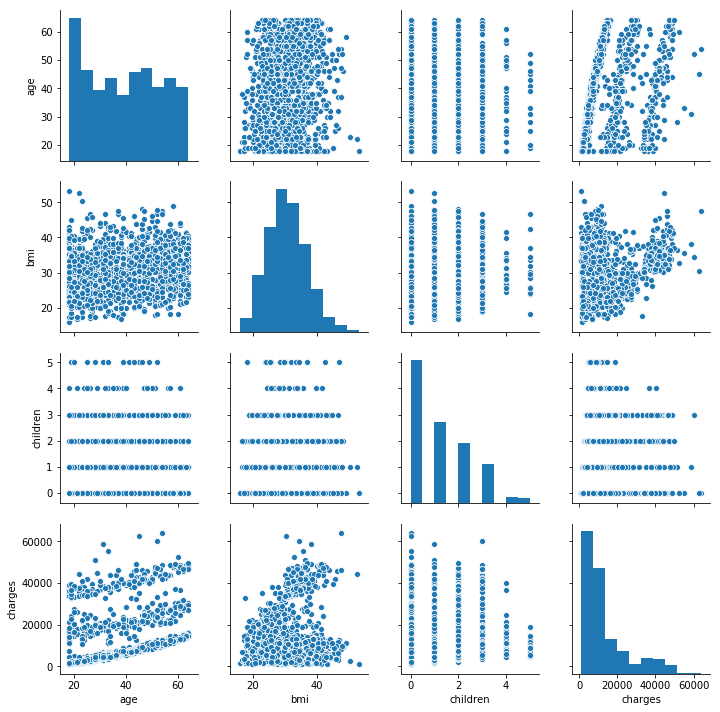

In [26]:
sns.pairplot(df)

***

# 4. Answer the following questions with statistical evidence


## a. Do charges of people who smoke differ significantly from the people who don't?


#### Step 1: State the null and alternative hypothesis:

* Null Hypthesis  $H_0$: charges don't differ significantly for smokers and non-smokers
* Alternate Hypotheis $H_a$: charges of people who smoke differ significantly from the people who don't

#### Step 2: Decide the significance level

Here we select α = 0.05

#### Step 3: Identify the test statistic

As population SD is unknown and two samples are independent, We will compare two samples with **Two-sample Indepndent t-test**.

In [27]:
#Get the required data
smoker_charges = df[df['smoker'] == 'yes']['charges']
nonsmoker_charges = df[df['smoker'] == 'no']['charges']

#### Step 4: Calculate p value

In [28]:
# two-sample t-test
t_statistic, p_value = ttest_ind(smoker_charges, nonsmoker_charges)
print("t_statistic: ",t_statistic)
print("P value: ",p_value)

t_statistic:  46.664921172723716
P value:  8.271435842177219e-283


#### Step 5:  Decide to reject or accept null hypothesis

As p value is less than significance level (0.05), reject the null hypothesis.<br>
**==> Charges of people who smoke differ significantly from the people who don't**

# b. Does bmi of males differ significantly from that of females?


#### Step 1: State the null and alternative hypothesis:

* Null Hypthesis  $H_0$: BMI of male and female doesn't differ
* Alternate Hypotheis $H_a$: BMI of males differs significantly from that of females

#### Step 2: Decide the significance level

Here we select α = 0.05

#### Step 3: Identify the test statistic

As population SD is unknown and two samples are independent, We will compare two samples with **Two-sample Indepndent t-test**.

In [29]:
#Get required data
male_bmi = df[df['sex'] == 'male']['bmi']
female_bmi = df[df['sex'] == 'female']['bmi']

#### Step 4: Calculate p value

In [30]:
t_statistic, p_value = ttest_ind(male_bmi, female_bmi)
print("t_statistic: ",t_statistic)
print("P value: ",p_value)

t_statistic:  1.696752635752224
P value:  0.08997637178984932


#### Step 5:  Decide to reject or accept null hypothesis

As p value is not less than significance level (0.05), don't reject the null hypothesis.<br>
**==> BMI of male and female doesn't differ significantly.**

*****

# c. Is the proportion of smokers significantly different in different genders?


#### Step 1: State the null and alternative hypothesis:

* Null Hypthesis  $H_0$: The proportions of smokers are equal in male and female
* Alternate Hypotheis $H_a$: The two proportions of smokers are not equal in male and female

#### Step 2: Decide the significance level

Here we select α = 0.05

#### Step 3: Identify the test statistic

* Two-sample* 'sex' and 'smoker' are two categorical variables
* We want to see if the proportion of smokers in the female population is significantly less than it is in the male population

z-test of proportion can be used for comparing two proportions of a catagorical variable t-test

In [31]:
# Calculate Proportions of female and male smokers
female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = df.sex.value_counts()[1] # number of females in the data
n_males = df.sex.value_counts()[0] #number of males in the data

In [32]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


The proportions are different but are they statistically significant?
#### Step 4: Calculate p value using z test of proportions

In [33]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])


#### Step 5:  Decide to reject or accept null hypothesis

In [34]:
if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null hypothesis|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null hypothsis|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null hypothesis|


#### Hence the proportion of smokers is significantly different in different genders

***

# d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [35]:
no_children_women_bmi = df[(df['sex']=="female") & (df['children'] == 0) ]['bmi']
one_child_women_bmi = df[(df['sex']=="female") & (df['children'] == 1) ]['bmi']
two_children_women_bmi = df[(df['sex']=="female") & (df['children'] == 2) ]['bmi']

In [36]:
print('Count, Mean and standard deviation of BMI of no children Women : %3d, %3.2f and %3.2f' % (len(no_children_women_bmi), no_children_women_bmi .mean(),np.std(no_children_women_bmi ,ddof =1)))
print('Count, Mean and standard deviation of BMI of one child Women   : %3d, %3.2f and %3.2f' % (len(one_child_women_bmi), one_child_women_bmi .mean(),np.std(one_child_women_bmi ,ddof =1)))
print('Count, Mean and standard deviation of BMI of two children Women: %3d, %3.2f and %3.2f' % (len(two_children_women_bmi), two_children_women_bmi .mean(),np.std(two_children_women_bmi ,ddof =1)))

Count, Mean and standard deviation of BMI of no children Women : 289, 30.36 and 5.97
Count, Mean and standard deviation of BMI of one child Women   : 158, 30.05 and 5.79
Count, Mean and standard deviation of BMI of two children Women: 119, 30.65 and 6.63


In [37]:
#Get data of bmi of women with no children, one child and tow children
df1 = df[(df['sex'] == 'female' ) & (df['children'] < 3 )][['children','bmi']]
df1.head()

,children,bmi
0,0,27.90
5,0,25.74
6,1,33.44
9,0,25.84
11,0,26.29


#### Let us explore the data graphically

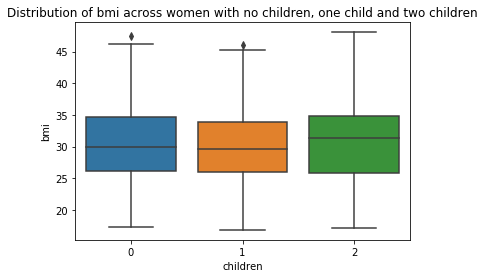

In [38]:
plt.title('Distribution of bmi across women with no children, one child and two children')
sns.boxplot(x = "children", y = "bmi", data = df1)

#### The boxplots show almost similar shapes, location and spreads and there is outlier for no and one child women bmi.

#### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$ ( i.e. Distribution of bmi across women with no children, one child and two children, the same)
* $H_A$: At least one $\mu$ differs (Distribution of BMI is not same)

Here $\mu1$, $\mu2$ and $\mu3$ are the mean BMI of women with no children, one child and two children respectively.

#### Step 2: Decide the significance level

Here we select α = 0.05

#### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

#### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [39]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('bmi ~ children', data = df1).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F   PR(>F)
children      2.512982    1.0  0.068411  0.79376
Residual  20717.738725  564.0       NaN      NaN


#### Step 5:  Decide to reject or accept null hypothesis

In this example, p value is 0.79376 and it is greater than our chosen level of signifance at 5%

So the statistical decision is not to reject the null hypothesis at 5% level of significance.

#### So there is  no sufficient evidence  to reject the null hypothesis that  distribution of bmi across women with no children, one child and two children is the same.